# Preparation

### Import and constants

In [18]:
import numpy as np
from numpy.random import seed
seed(12345)

import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from google.colab import drive
from google.colab.patches import cv2_imshow

In [19]:
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [20]:
#get name of image with index
def file_name(image_num):
  return "image{}.jpg".format(image_num)

#get full path of image with index
def file_path(image_num):
  folder = 'drive/MyDrive/Colab Notebooks/StreetCamera_X'
  return os.path.join(folder,file_name(image_num))

###Data preparation


In [21]:
# Load data from the folder
train_dataset = []
test_dataset = []
for image_num in range(0,21553,6): #we will take not all data for the first time
  img = cv2.imread(file_path(image_num))
  if img is not None:
    train_dataset.append(img)

for image_num in range(1,21554,30): #this way be another data
  img = cv2.imread(file_path(image_num))
  if img is not None:
    test_dataset.append(img)

train_dataset = np.array(train_dataset)
test_dataset = np.array(test_dataset)

In [22]:
hight = train_dataset.shape[1]
width = train_dataset.shape[2]

### Data inspaction

In [23]:
print('Train set:   ', len(train_dataset), 'samples')
print('Test set:    ', len(test_dataset), 'samples')
print('Sample dims: ', train_dataset.shape)

Train set:    3593 samples
Test set:     719 samples
Sample dims:  (3593, 360, 640, 3)


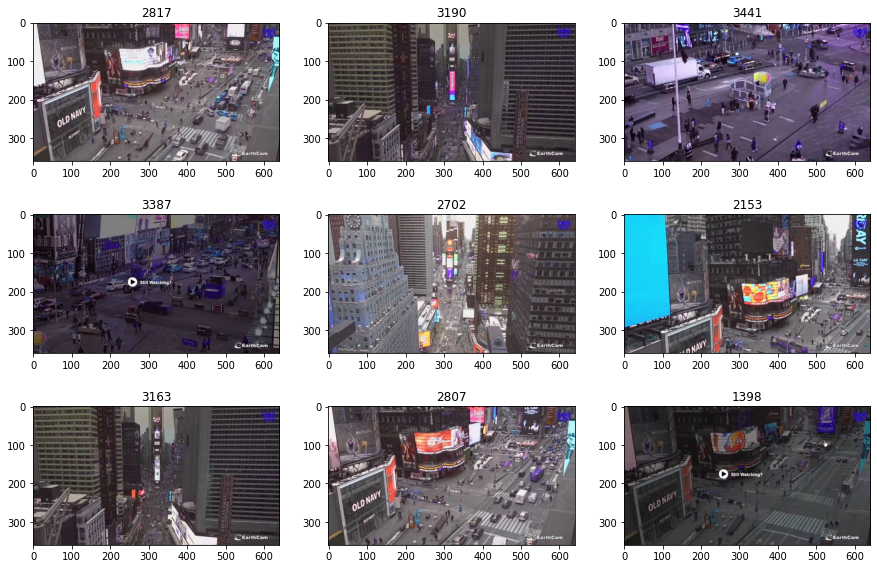

In [25]:
# Show random samples
for ii in range(9):
    image_num = np.random.randint(0, len(train_dataset))
    plt.subplot(3,3,ii+1), plt.imshow(train_dataset[image_num, ...])
    plt.title(str(image_num))

#Building model

In [16]:
# Normalization

#train_dataset = train_dataset/255 - this way colab crash
for ii in range(len(train_dataset)):
  train_dataset[ii, ...] = train_dataset[ii, ...]/255

test_dataset = test_dataset/255